In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
import numpy as np
np.random.seed(5)

In [2]:
mnist = datasets.load_digits()

In [3]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
features, labels = mnist.data, mnist.target

In [6]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [8]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [9]:
X_test.shape, y_test.shape

((360, 64), (360,))

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
knn = KNeighborsClassifier()

In [12]:
svm = SVC()

In [13]:
dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=20,
    random_state=35
)

In [14]:
knn = KNeighborsClassifier(
    n_neighbors=100,
    n_jobs=None
)

In [15]:
svm = SVC(
    C=0.1, # 선을 그을 때의 기울기
    gamma=0.003, # 곡선의 정도
    kernel='rbf', # rbf : 곡선
    probability=True # 각 라벨링 값으로 될 가능성 구해주세요
)

In [16]:
dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

In [17]:
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

In [18]:
svm.fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [19]:
print('accuracy=====================')
print('dtree >>', accuracy_score(y_test, dtree_predicted))
print('knn >>', accuracy_score(y_test, knn_predicted))
print('svm >>', accuracy_score(y_test, svm_predicted))

accuracy=====================
dtree >> 0.8888888888888888
knn >> 0.9388888888888889
svm >> 0.8916666666666667


In [20]:
dtree_proba = dtree.predict_proba(X_test)
dtree_proba[:2] # 5일 확률이 가장 높음

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
np.argmax(dtree_proba[:1]), np.argmin(dtree_proba[:1])

(5, 0)

In [22]:
knn_proba = knn.predict_proba(X_test)
knn_proba[[1,9]] # 5일 확률이 가장 높음

array([[0.  , 0.  , 0.88, 0.08, 0.  , 0.  , 0.  , 0.  , 0.03, 0.01],
       [0.  , 0.07, 0.01, 0.01, 0.  , 0.58, 0.  , 0.14, 0.18, 0.01]])

In [23]:
np.argmax(knn_proba[:1]), np.argmin(knn_proba[:1])

(5, 0)

In [24]:
svm_proba = svm.predict_proba(X_test)
svm_proba[:2] # 5일 확률이 가장 높음

array([[2.57914632e-03, 1.07491863e-02, 5.14532191e-03, 4.43765984e-03,
        4.48211141e-03, 8.49370981e-01, 2.66537916e-03, 9.44510231e-03,
        1.02081385e-01, 9.04372677e-03],
       [1.03021009e-03, 6.25655530e-04, 9.90336127e-01, 7.40750763e-04,
        2.75928007e-04, 1.02863879e-03, 6.07423859e-04, 7.35342147e-04,
        3.99973418e-03, 6.20189985e-04]])

In [25]:
np.argmax(svm_proba[:1]), np.argmin(svm_proba[:1])

(5, 0)

## 2. 앙상블 모델

#### &nbsp;&nbsp;&nbsp;&nbsp; 1) 하드 보팅

In [26]:
voting_clf1 = VotingClassifier(
    estimators=[('decision tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1, 1, 1], # 가중치
    voting='hard' # voting 방식
)

In [27]:
voting_clf1.fit(X_train, y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9527777777777777

In [28]:
# dtree : 2, knn : 2, svm : 1==> 2(2): 1(1) ==> 다수결의 원칙에 따라 2로 판단!

In [29]:
hard_voting_predicted[[1,50]]

array([2, 3])

#### &nbsp;&nbsp;&nbsp;&nbsp; 2) 소프트 보팅

In [30]:
voting_clf2 = VotingClassifier(
    estimators=[('decision tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1, 1, 1], # 가중치
    voting='soft' # voting 방식
)

In [31]:
voting_clf2.fit(X_train, y_train)
soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9361111111111111

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1) 그래프로 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

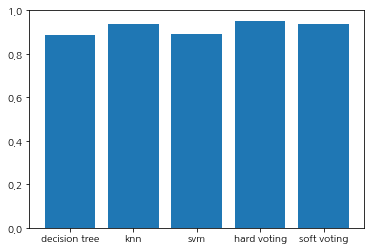

In [33]:
x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);